In [120]:
import pandas as pd


match_df = pd.read_csv("match_data_582_converted.csv")



In [121]:

# To ensure time order
match_data_sorted = match_df.sort_values(['fixture_id', 'halftime', 'minute', 'second'])
match_data_sorted.head()

,fixture_id,halftime,current_time,half_start_datetime,match_start_datetime,minute,second,latest_bookmaker_update,suspended,stopped,...,Throwins - home,Total Crosses - away,Total Crosses - home,Yellowcards - away,Yellowcards - home,Yellowred Cards - away,Yellowred Cards - home,current_state,final_score,result
952,19134453.0,1st-half,2024-08-16 19:01:19,2024-08-16 19:00:31,2024-08-16 19:00:31,0,48,2024-08-16 19:01:17,False,False,...,0.0,NaN,NaN,0.0,0.0,NaN,NaN,X,1-0,1
953,19134453.0,1st-half,2024-08-16 19:02:18,2024-08-16 19:00:31,2024-08-16 19:00:31,1,47,2024-08-16 19:02:16,False,False,...,0.0,NaN,NaN,0.0,0.0,NaN,NaN,X,1-0,1
954,19134453.0,1st-half,2024-08-16 19:03:19,2024-08-16 19:00:31,2024-08-16 19:00:31,2,48,2024-08-16 19:03:15,False,False,...,0.0,NaN,NaN,0.0,0.0,NaN,NaN,X,1-0,1
955,19134453.0,1st-half,2024-08-16 19:04:18,2024-08-16 19:00:31,2024-08-16 19:00:31,3,47,2024-08-16 19:04:08,False,False,...,0.0,NaN,NaN,0.0,0.0,NaN,NaN,X,1-0,1
956,19134453.0,1st-half,2024-08-16 19:05:19,2024-08-16 19:00:31,2024-08-16 19:00:31,4,48,2024-08-16 19:05:15,False,False,...,0.0,NaN,NaN,0.0,0.0,NaN,NaN,X,1-0,1


In [122]:
# Forward fill missing values from column 15 onwards, then fill remaining missing values with 0
columns_to_fill = match_data_sorted.columns[15:]  # Selecting columns from the 15th column onward
match_data_sorted[columns_to_fill] = match_data_sorted[columns_to_fill].ffill().fillna(0)

# Display the first few rows to verify the filling process
match_data_sorted.head()

,fixture_id,halftime,current_time,half_start_datetime,match_start_datetime,minute,second,latest_bookmaker_update,suspended,stopped,...,Throwins - home,Total Crosses - away,Total Crosses - home,Yellowcards - away,Yellowcards - home,Yellowred Cards - away,Yellowred Cards - home,current_state,final_score,result
952,19134453.0,1st-half,2024-08-16 19:01:19,2024-08-16 19:00:31,2024-08-16 19:00:31,0,48,2024-08-16 19:01:17,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,X,1-0,1
953,19134453.0,1st-half,2024-08-16 19:02:18,2024-08-16 19:00:31,2024-08-16 19:00:31,1,47,2024-08-16 19:02:16,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,X,1-0,1
954,19134453.0,1st-half,2024-08-16 19:03:19,2024-08-16 19:00:31,2024-08-16 19:00:31,2,48,2024-08-16 19:03:15,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,X,1-0,1
955,19134453.0,1st-half,2024-08-16 19:04:18,2024-08-16 19:00:31,2024-08-16 19:00:31,3,47,2024-08-16 19:04:08,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,X,1-0,1
956,19134453.0,1st-half,2024-08-16 19:05:19,2024-08-16 19:00:31,2024-08-16 19:00:31,4,48,2024-08-16 19:05:15,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,X,1-0,1


In [123]:
# Adjust minutes where halftime is "2nd-half"
match_data_sorted.loc[match_data_sorted['halftime'] == '2nd-half', 'minute'] += 45



In [124]:
match_data_sorted['P(1)_v1'] = 1 / match_data_sorted['1']
match_data_sorted['P(X)_v1'] = 1 / match_data_sorted['X']
match_data_sorted['P(2)_v1'] = 1 / match_data_sorted['2']

# Calculate the sum of reciprocal odds
match_data_sorted['match_total_prob'] = match_data_sorted['P(1)_v1'] + match_data_sorted['P(X)_v1'] + match_data_sorted['P(2)_v1']

# Normalize each probability
match_data_sorted['1'] = match_data_sorted['P(1)_v1'] / match_data_sorted['match_total_prob']
match_data_sorted['X'] = match_data_sorted['P(X)_v1'] / match_data_sorted['match_total_prob']
match_data_sorted['2'] = match_data_sorted['P(2)_v1'] / match_data_sorted['match_total_prob']

# Drop intermediate columns if not needed
match_data_sorted.drop(columns=['P(1)_v1', 'P(X)_v1', 'P(2)_v1', 'match_total_prob'], inplace=True)

# Display the first few rows to verify the optimization
match_data_sorted[['fixture_id', 'minute', '1', 'X', '2']].head()


,fixture_id,minute,1,X,2
952,19134453.0,0,0.572410,0.237550,0.190040
953,19134453.0,1,0.572410,0.237550,0.190040
954,19134453.0,2,0.589891,0.237431,0.172677
955,19134453.0,3,0.579878,0.233401,0.186721
956,19134453.0,4,0.579878,0.233401,0.186721


In [125]:
# List of percentage columns to normalize
percentage_columns = [
    'Ball Possession % - away',
    'Ball Possession % - home',
    'Successful Passes Percentage - away',
    'Successful Passes Percentage - home'
]

# Normalize percentage columns to a range [0, 1] by dividing by 100
match_data_sorted[percentage_columns] = match_data_sorted[percentage_columns] / 100

# Display the first few rows to verify normalization
match_data_sorted[['fixture_id', 'minute'] + percentage_columns].head()



,fixture_id,minute,Ball Possession % - away,Ball Possession % - home,Successful Passes Percentage - away,Successful Passes Percentage - home
952,19134453.0,0,1.00,0.00,1.00,0.00
953,19134453.0,1,0.60,0.40,1.00,0.50
954,19134453.0,2,0.25,0.75,0.71,0.95
955,19134453.0,3,0.17,0.83,0.71,0.94
956,19134453.0,4,0.17,0.83,0.71,0.94


In [126]:
# Function to list continuous features
def list_continuous_features(df):
    # Exclude non-continuous columns such as fixture_id, minute, odds, and result
    excluded_columns = ['fixture_id', 'minute', '1', 'X', '2', 'result']
    continuous_features = [col for col in df.columns if df[col].dtype in ['float64', 'int64'] and col not in excluded_columns]
    return continuous_features

# Get the list of continuous features
continuous_features = list_continuous_features(match_data_sorted)

# Display the list of continuous features
continuous_features



['second',
 'Accurate Crosses - away',
 'Accurate Crosses - home',
 'Assists - away',
 'Assists - home',
 'Attacks - away',
 'Attacks - home',
 'Ball Possession % - away',
 'Ball Possession % - home',
 'Ball Safe - away',
 'Ball Safe - home',
 'Challenges - away',
 'Challenges - home',
 'Corners - away',
 'Corners - home',
 'Counter Attacks - away',
 'Counter Attacks - home',
 'Dangerous Attacks - away',
 'Dangerous Attacks - home',
 'Dribble Attempts - away',
 'Dribble Attempts - home',
 'Fouls - away',
 'Fouls - home',
 'Free Kicks - away',
 'Free Kicks - home',
 'Goal Attempts - away',
 'Goal Attempts - home',
 'Goal Kicks - away',
 'Goal Kicks - home',
 'Goals - away',
 'Goals - home',
 'Headers - away',
 'Headers - home',
 'Hit Woodwork - away',
 'Hit Woodwork - home',
 'Injuries - away',
 'Injuries - home',
 'Interceptions - away',
 'Interceptions - home',
 'Key Passes - away',
 'Key Passes - home',
 'Long Passes - away',
 'Long Passes - home',
 'Offsides - away',
 'Offsides - ho

In [127]:
# Normalize continuous features for both home and away by dividing by the sum (home + away)
for feature in continuous_features:
    if 'home' in feature and feature.replace('home', 'away') in continuous_features:
        away_feature = feature.replace('home', 'away')
        match_data_sorted[feature] = match_data_sorted[feature] / (
            match_data_sorted[feature] + match_data_sorted[away_feature] + 1e-10
        )
        match_data_sorted[away_feature] = match_data_sorted[away_feature] / (
            match_data_sorted[feature] + match_data_sorted[away_feature] + 1e-10
        )

# Create a new DataFrame with normalized values
normalized_data = match_data_sorted[['fixture_id', 'minute', '1', 'X', '2', 'result'] + continuous_features].copy()

# Fill any NaN values with 0 after normalization
normalized_data.fillna(0, inplace=True)

# Display the first few rows to verify the new normalized DataFrame
normalized_data.head()




,fixture_id,minute,1,X,2,result,second,Accurate Crosses - away,Accurate Crosses - home,Assists - away,...,Tackles - away,Tackles - home,Throwins - away,Throwins - home,Total Crosses - away,Total Crosses - home,Yellowcards - away,Yellowcards - home,Yellowred Cards - away,Yellowred Cards - home
952,19134453.0,0,0.572410,0.237550,0.190040,1,48,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
953,19134453.0,1,0.572410,0.237550,0.190040,1,47,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
954,19134453.0,2,0.589891,0.237431,0.172677,1,48,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
955,19134453.0,3,0.579878,0.233401,0.186721,1,47,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
956,19134453.0,4,0.579878,0.233401,0.186721,1,48,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
# Add 'match_start_datetime' to the DataFrame for splitting
normalized_data['match_start_datetime'] = match_data_sorted['match_start_datetime']

# Convert 'match_start_datetime' to datetime for easier splitting
normalized_data['match_start_datetime'] = pd.to_datetime(normalized_data['match_start_datetime'])

# Split the data based on the date "2024-11-01"
train_data = normalized_data[normalized_data['match_start_datetime'] < '2024-11-01'].copy()
test_data = normalized_data[normalized_data['match_start_datetime'] >= '2024-11-01'].copy()

# Drop 'match_start_datetime' from both sets after splitting
train_data.drop(columns=['match_start_datetime'], inplace=True)
test_data.drop(columns=['match_start_datetime'], inplace=True)

unique_fixtures_test = test_data['fixture_id'].nunique()
unique_fixtures_test

111

In [129]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder



In [130]:
label_encoder = LabelEncoder()
train_data['encoded_result'] = label_encoder.fit_transform(train_data['result'])
test_data['encoded_result'] = label_encoder.transform(test_data['result'])

# Prepare X_train, y_train, X_test, y_test
X_train = train_data.drop(columns=['result', 'fixture_id', 'encoded_result'])
y_train = train_data['encoded_result']
X_test = test_data.drop(columns=['result', 'fixture_id', 'encoded_result'])
y_test = test_data['encoded_result']



In [131]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  

# Updated parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 150],  # Number of trees
    'learning_rate': [0.05, 0.1],  # Shrinkage step size
    'max_depth': [3, 5],  # Tree depth to control overfitting
    'min_child_weight': [1, 5],  # Minimum sum of instance weights for a child node
    'gamma': [0, 0.1],  # Minimum loss reduction required to make a further split
    'subsample': [0.8, 1.0],  # Fraction of samples used for training each tree
    'colsample_bytree': [0.8, 1.0],  # Fraction of features used for each tree
}

# GridSearchCV with XGBoost
grid_search_xgb = GridSearchCV(
    estimator=model,
    param_grid=param_grid_xgb,
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,  # Use all CPU cores
    verbose=1
)

# Check if the sample size doesn't exceed available data
sample_size = min(20000, len(X_train))
X_train_sampled = X_train.sample(n=sample_size, random_state=42)
y_train_sampled = y_train.loc[X_train_sampled.index]

# Perform the Grid Search
grid_search_xgb.fit(X_train_sampled, y_train_sampled)

# Get the best model, parameters, and score
best_model_xgb = grid_search_xgb.best_estimator_
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

print("Best Params:", best_params_xgb)
print("Best Score:", best_score_xgb)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


/Users/fatih/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:59:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/fatih/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:59:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/fatih/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:59:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/fatih/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:59:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarni

Best Params: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 150, 'subsample': 0.8}
Best Score: 0.9637999723176157


Test Set Accuracy: 0.66
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      5540
           1       0.64      0.66      0.65      3061
           2       0.44      0.41      0.43      2348

    accuracy                           0.66     10949
   macro avg       0.61      0.61      0.61     10949
weighted avg       0.66      0.66      0.66     10949



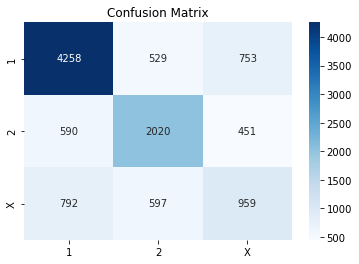

In [132]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = best_model_xgb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {acc:.2f}")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.show()


In [134]:
from sklearn.linear_model import LogisticRegression

#  Logistic Regression (GLM) model with regularization
model_glm = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000)

# Hyperparameter grid for regularization strength
param_grid_glm = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength (inverse of lambda)
    'penalty': ['l1', 'l2'],  # L1 for Lasso, L2 for Ridge regularization
}

# Grid search for GLM
grid_search_glm = GridSearchCV(estimator=model_glm, param_grid=param_grid_glm, cv=3, n_jobs=-1, verbose=1)
grid_search_glm.fit(X_train, y_train)

# Get best model, parameters, and score
best_model_glm = grid_search_glm.best_estimator_
best_params_glm = grid_search_glm.best_params_
best_score_glm = grid_search_glm.best_score_

print("Best Params for GLM:", best_params_glm)
print("Best Score for GLM:", best_score_glm)



Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/fatih/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/fatih/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/fatih/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/fatih/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/fatih/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:

Best Params for GLM: {'C': 0.01, 'penalty': 'l1'}
Best Score for GLM: 0.6563071987923389


GLM Test Set Accuracy: 0.68
              precision    recall  f1-score   support

           0       0.78      0.75      0.77      5540
           1       0.65      0.71      0.68      3061
           2       0.47      0.45      0.46      2348

    accuracy                           0.68     10949
   macro avg       0.63      0.64      0.63     10949
weighted avg       0.68      0.68      0.68     10949



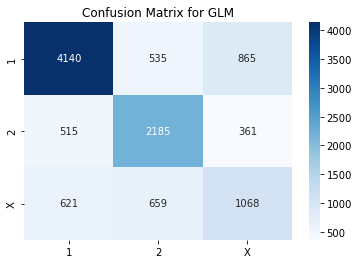

In [135]:

# Predict on test set
y_pred_glm = best_model_glm.predict(X_test)

# Evaluate GLM performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

accuracy_glm = accuracy_score(y_test, y_pred_glm)
print(f"GLM Test Set Accuracy: {accuracy_glm:.2f}")
print(classification_report(y_test, y_pred_glm))

# Confusion Matrix for GLM
cm_glm = confusion_matrix(y_test, y_pred_glm)
sns.heatmap(cm_glm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for GLM')
plt.show()

In [137]:
from sklearn.ensemble import RandomForestClassifier



# Random Forest Classifier
model_rf = RandomForestClassifier(random_state=42)

# Updated hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 150],  # Number of trees
    'max_depth': [10, 15, 20],  # Focus on key depths
    'min_samples_split': [2, 5],  # Minimum samples required for split
    'min_samples_leaf': [1, 2],  # Minimum samples per leaf
    'bootstrap': [True]  # Only test bootstrap=True to reduce combinations
}

# GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(
    estimator=model_rf,
    param_grid=param_grid_rf,
    cv=3,  # 3-fold cross-validation
    n_jobs=4,  # Use 4 cores to balance load
    verbose=1
)

# Fit with reduced grid
grid_search_rf.fit(X_train, y_train)

# Get best model, parameters, and score
best_model_rf = grid_search_rf.best_estimator_
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best Params for Random Forest:", best_params_rf)
print("Best Score for Random Forest:", best_score_rf)




Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Params for Random Forest: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Best Score for Random Forest: 0.6452118124351354


Random Forest Test Set Accuracy: 0.68
              precision    recall  f1-score   support

           0       0.78      0.75      0.77      5540
           1       0.64      0.74      0.68      3061
           2       0.48      0.43      0.45      2348

    accuracy                           0.68     10949
   macro avg       0.63      0.64      0.63     10949
weighted avg       0.68      0.68      0.68     10949



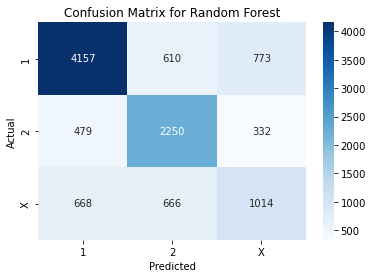

In [138]:
best_model_rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = best_model_rf.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Set Accuracy: {accuracy_rf:.2f}")

# Print classification report
print(classification_report(y_test, y_pred_rf))

# Plot confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [142]:
def live_betting_strategy(model, test_df, confidence_threshold=0.7):
    decisions = {}
    
    for fixture_id in test_df['fixture_id'].unique():
        # Filter data for the specific fixture and sort by time
        fixture_data = test_df[test_df['fixture_id'] == fixture_id].sort_values(by='minute')
        
        for _, row in fixture_data.iterrows():
            # Extract features up to the current minute
            X_single = row.drop(['result', 'fixture_id', 'encoded_result']).values.reshape(1, -1)
            pred_proba = model.predict_proba(X_single)[0]  # Get probability predictions
            pred_class = model.classes_[pred_proba.argmax()]  # Get predicted class (1, 2, or X)
            max_proba = pred_proba.max()  # Maximum probability (confidence)

            # If confidence exceeds the threshold, make a prediction
            if max_proba >= confidence_threshold:
                decisions[fixture_id] = {
                    'minute': row['minute'],
                    'prediction': label_encoder.inverse_transform([pred_class])[0],  # Convert encoded to actual label
                    'confidence': max_proba
                }
                break  # Stop after making the first confident decision

        # If no confident prediction was made during the entire match
        if fixture_id not in decisions:
            decisions[fixture_id] = {
                'minute': None,
                'prediction': "no action",
                'confidence': None
            }

    return pd.DataFrame.from_dict(decisions, orient='index')


In [143]:
# Run live betting strategy for XGBoost, GLM, and Random Forest
confidence_threshold = 0.7

xgboost_decisions = live_betting_strategy(best_model_xgb, test_data, confidence_threshold=confidence_threshold)
glm_decisions = live_betting_strategy(best_model_glm, test_data, confidence_threshold=confidence_threshold)
rf_decisions = live_betting_strategy(best_model_rf, test_data, confidence_threshold=confidence_threshold)


In [144]:
def evaluate_strategy_performance(decisions_df, true_results):
    total_bets = 0
    correct_bets = 0
    cumulative_return = 0

    for fixture_id, decision in decisions_df.iterrows():
        prediction = decision['prediction']
        
        # Skip if "no action"
        if prediction == "no action":
            continue

        true_result = true_results.get(fixture_id)
        total_bets += 1
        
        if prediction == true_result:
            correct_bets += 1
            cumulative_return += 1  # Gain 1 unit for correct prediction
        else:
            cumulative_return -= 1  # Lose 1 unit for incorrect prediction

    accuracy = correct_bets / total_bets if total_bets > 0 else 0
    return {
        'Total Bets': total_bets,
        'Correct Bets': correct_bets,
        'Accuracy': accuracy,
        'Cumulative Return': cumulative_return
    }


In [145]:
# True results from the test set
true_results = test_data.groupby('fixture_id')['result'].first().to_dict()

# Evaluate all models
xgboost_performance = evaluate_strategy_performance(xgboost_decisions, true_results)
glm_performance = evaluate_strategy_performance(glm_decisions, true_results)
rf_performance = evaluate_strategy_performance(rf_decisions, true_results)

# Create a comparison table
performance_df = pd.DataFrame({
    'XGBoost': xgboost_performance,
    'GLM': glm_performance,
    'Random Forest': rf_performance
}).T

performance_df.columns = ['Total Bets', 'Correct Bets', 'Accuracy', 'Cumulative Return']
performance_df.reset_index(inplace=True)
performance_df.rename(columns={'index': 'Model'}, inplace=True)

# Display performance comparison table
print(performance_df)


           Model  Total Bets  Correct Bets  Accuracy  Cumulative Return
0        XGBoost       111.0          64.0  0.576577               17.0
1            GLM       111.0          79.0  0.711712               47.0
2  Random Forest        99.0          80.0  0.808081               61.0


Adam (2016): Used GLMs with L2 regularization to predict match scores. The study combined player-based features (e.g., previous match performances) and team-based features (e.g., FIFA ratings).Inspired the use of cumulative and momentum-based features like shots and goals, highlighting that both long-term and short-term trends are crucial.
Bunker and Thabtah (2019) reviewed sports outcome prediction methods and highlighted the importance of rolling statistics for live data. For soccer, features like “number of shots in the last 5 minutes” and “recent fouls” were emphasized to capture match dynamics.
Rolling window features like shots_last_5_home and fouls_last_5_home help track short-term performance.
Angelini et al. (2020) demonstrated that odds changes during a match reflect new market beliefs about the game's likely outcome. Their research underlined that sudden shifts in odds can indicate events like goals or red cards.
Odds-related features can act as “market signals” for feature engineering.
Eggels et al. (2016) Proposed adding binary features for key events (e.g., goals, red cards, substitutions). Their study proved that these events significantly impact in-game predictions.
Event indicators such as is_goal_home_recent and is_red_card_away_recent are engineered and inspired in thid domain.
Lastly Decroos et al. (2019) introduced “Soccer Action Models” to assess game states by combining cumulative actions and recent plays. Their work showed that momentum metrics (e.g., shots and dangerous attacks in a time window) significantly contribute to outcome predictions.
Momentum features engineered to provide a snapshot of recent dominance in the game.